In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('py_sent_Spa_to_Eng.csv')

In [6]:
ordered_columns = ['English', 'Spanish', 
                   'English_POS', 'Spanish_POS', 
                   'English_NEU', 'Spanish_NEU', 
                   'English_NEG', 'Spanish_NEG', 
                  ]

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df

,English,Spanish,English_POS,Spanish_POS,English_NEU,Spanish_NEU,English_NEG,Spanish_NEG
0,They are long and apart from this this mention...,Son largas y aparte esta esta mención es. Para...,0.875495,0.178211,0.008326,0.310165,0.116179,0.511624
1,And very important people have passed through ...,Y han pasado personas muy importantes por esta...,0.012312,0.006229,0.271527,0.808546,0.716161,0.185225
2,Formal cycle and from here the podcast of the ...,Ciclo formal y a partir de aquí el podcast del...,0.040908,0.010803,0.312181,0.587000,0.646912,0.402197
3,But it must be clarified that obviously we wil...,Pero hay que aclarar que obviamente seguiremos...,0.916831,0.890090,0.001112,0.004094,0.082058,0.105816
4,"Yes, comments are accepted from artists who wa...",Si se aceptan comentarios de artistas que quie...,0.353594,0.461789,0.012553,0.056109,0.633853,0.482102
...,...,...,...,...,...,...,...,...
1233,"Well, the same thing happens in this area and ...","Bueno, en esta zona pasa lo mismo y se dice es...",0.025917,0.026308,0.039737,0.340978,0.934346,0.632714
1234,"NOA, which is the national Ocean Service organ...","La noa, que es la organización nacional Ocean ...",0.029329,0.059387,0.016204,0.390777,0.954467,0.549836
1235,He made a list of the most dangerous maritime ...,Hizo una lista de las zonas marítimas más peli...,0.011452,0.014125,0.559664,0.613403,0.428884,0.372471
1236,And in reality the ship had gone out in a stor...,Y en realidad el barco había salido con una to...,0.395767,0.069381,0.019667,0.076158,0.584566,0.854461


In [8]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['English_POS','English_NEU','English_NEG']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['Spanish_POS','Spanish_NEU','Spanish_NEG']].idxmax(axis=1)

# Remove the prefix "English_" from each entry in the 'eng_highest_sent' 
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('English_', '') 

# Remove the prefix "Spanish_" from each entry in the 'spa_highest_sent' 
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('Spanish_', '')

In [9]:
# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()
matching_count

818

In [10]:
# Create a new DataFrame with the mismatched sentiments, preserving the index
df_mismatches = df[df['eng_highest_sent'] != df['spa_highest_sent']].copy()
df_mismatches

,English,Spanish,English_POS,Spanish_POS,English_NEU,Spanish_NEU,English_NEG,Spanish_NEG,eng_highest_sent,spa_highest_sent
0,They are long and apart from this this mention...,Son largas y aparte esta esta mención es. Para...,0.875495,0.178211,0.008326,0.310165,0.116179,0.511624,POS,NEG
1,And very important people have passed through ...,Y han pasado personas muy importantes por esta...,0.012312,0.006229,0.271527,0.808546,0.716161,0.185225,NEG,NEU
2,Formal cycle and from here the podcast of the ...,Ciclo formal y a partir de aquí el podcast del...,0.040908,0.010803,0.312181,0.587000,0.646912,0.402197,NEG,NEU
5,"In fact one of the rules, when our guest comes...","¿De hecho una de las reglas, cuando llega aquí...",0.278015,0.023425,0.026265,0.545202,0.695720,0.431373,NEG,NEU
6,Traca traca and that should no longer be done....,Traca traca y eso ya no se debe de hacer. Yo n...,0.022831,0.017988,0.444559,0.757546,0.532610,0.224466,NEG,NEU
...,...,...,...,...,...,...,...,...,...,...
1223,"I don't know how to say it, I don't want to be...","No sé cómo se dice, yo no quiero ser irrespetu...",0.007321,0.096376,0.545009,0.195987,0.447671,0.707637,NEU,NEG
1224,It is precisely that the Bermuda triangle is o...,Es que justamente es que justamente el triángu...,0.055161,0.641230,0.006730,0.018265,0.938109,0.340506,NEG,POS
1226,There is no fixed north to point to because ev...,No hay un norte fijo al que apuntar porque tod...,0.024705,0.002801,0.099667,0.943508,0.875629,0.053691,NEG,NEU
1227,"But hey, I found the compass thing very intere...","Pero bueno, lo de las brújulas me pareció muy ...",0.219206,0.017737,0.172457,0.801551,0.608338,0.180712,NEG,NEU


In [12]:
from scipy import stats
df.dropna(inplace=True)

# Calculate the differences
df['diff_POS'] = df['English_POS'] - df['Spanish_POS']
df['diff_NEU'] = df['English_NEU'] - df['Spanish_NEU']
df['diff_NEG'] = df['English_NEG'] - df['Spanish_NEG']

# Descriptive statistics
descriptive_stats = df[['diff_POS', 'diff_NEU', 'diff_NEG']].describe()

print("Descriptive Statistics for Differences:")
descriptive_stats

Descriptive Statistics for Differences:


,diff_POS,diff_NEU,diff_NEG
count,1237.000000,1237.000000,1237.000000
mean,0.045250,-0.092539,0.047289
std,0.221330,0.264594,0.293096
min,-0.857040,-0.919001,-0.809577
25%,-0.021063,-0.212489,-0.107057
50%,0.000685,-0.038954,0.039207
75%,0.070710,0.000665,0.227212
max,0.940472,0.829791,0.856360


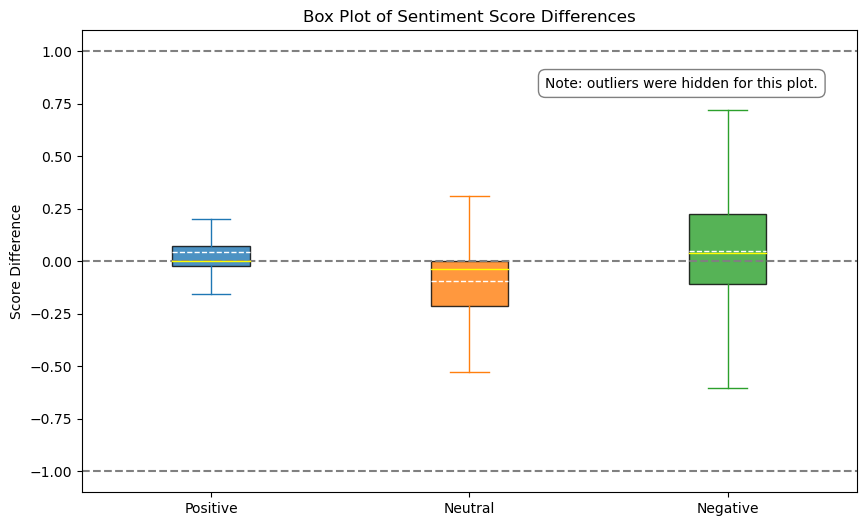

In [13]:
# Define the colors for each sentiment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for POS, orange for NEU, green for NEG

# Create box plots with custom colors and mean line, and hide outliers
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df['diff_POS'], df['diff_NEU'], df['diff_NEG']], labels=['Positive', 'Neutral', 'Negative'],
                 patch_artist=True, showmeans=True, meanline=True, showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Set the properties of the boxplot elements
for i, color in enumerate(colors):
    plt.setp(bp['boxes'][i], facecolor=color, alpha=0.8)
    plt.setp(bp['whiskers'][2*i:2*i+2], color=color)
    plt.setp(bp['caps'][2*i:2*i+2], color=color)
    # As outliers are hidden, no need to set fliers properties
    plt.setp(bp['means'][i], color='white')
    plt.setp(bp['medians'][i], color='yellow')

plt.title('Box Plot of Sentiment Score Differences')
plt.ylabel('Score Difference')
plt.show()

In [15]:
from scipy.stats import ttest_rel

# Conduct paired t-tests
t_test_POS = stats.ttest_rel(df['Spanish_POS'], df['English_POS'])
t_test_NEU = stats.ttest_rel(df['Spanish_NEU'], df['English_NEU'])
t_test_NEG = stats.ttest_rel(df['Spanish_NEG'], df['English_NEG'])

alpha = 0.05

# Conduct paired t-tests and filter results based on significance level
t_test_POS = ttest_rel(df['English_POS'], df['Spanish_POS'])
if t_test_POS.pvalue < alpha:
    print(f"Paired T-Test for POS is significant: statistic={t_test_POS.statistic}, p-value={t_test_POS.pvalue}")
else:
    print(f"Paired T-Test for POS there is not significant: p-value={t_test_POS.pvalue}")

t_test_NEU = ttest_rel(df['English_NEU'], df['Spanish_NEU'])
if t_test_NEU.pvalue < alpha:
    print(f"Paired T-Test for NEU is significant: statistic={t_test_NEU.statistic}, p-value={t_test_NEU.pvalue}")
else:
    print(f"Paired T-Test for NEU is not significant: p-value={t_test_NEU.pvalue}")

t_test_NEG = ttest_rel(df['English_NEG'], df['Spanish_NEG'])
if t_test_NEG.pvalue < alpha:
    print(f"Paired T-Test for NEG is significant: statistic={t_test_NEG.statistic}, p-value={t_test_NEG.pvalue}")
else:
    print(f"Paired T-Test for NEG is not significant: p-value={t_test_NEG.pvalue}")

Paired T-Test for POS is significant: statistic=7.190599926647878, p-value=1.11408396076636e-12
Paired T-Test for NEU is significant: statistic=-12.300643381379704, p-value=6.905101719713092e-33
Paired T-Test for NEG is significant: statistic=5.674540075609218, p-value=1.730819290941959e-08


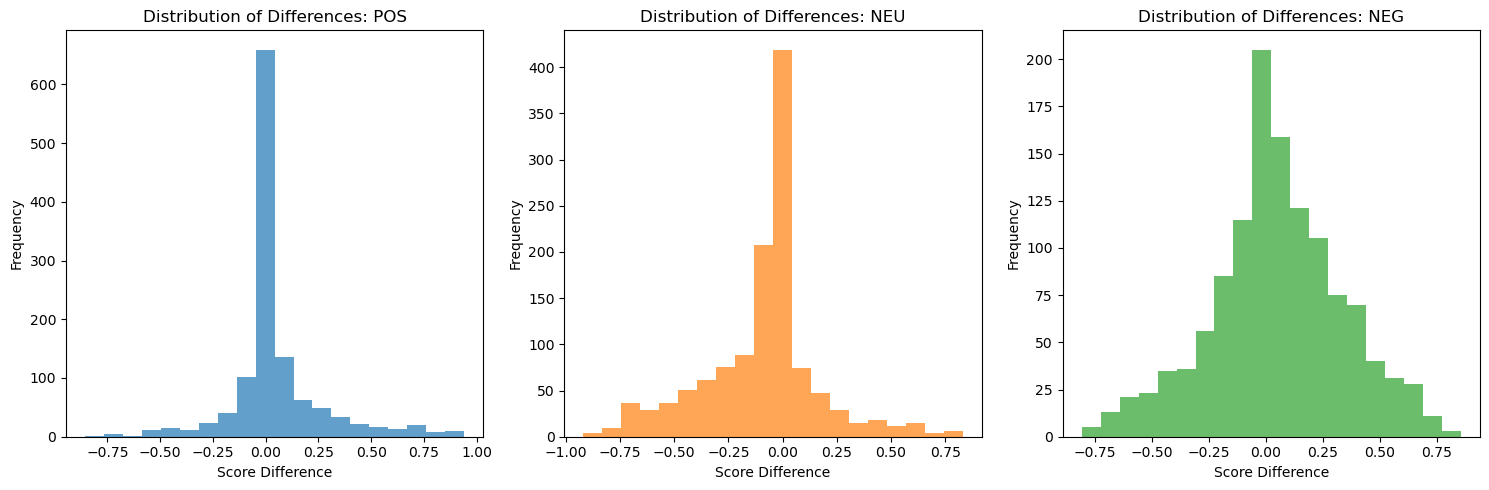

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].hist(df[f'diff_{sentiment}'], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Distribution of Differences: {sentiment}')
    axes[i].set_xlabel('Score Difference')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

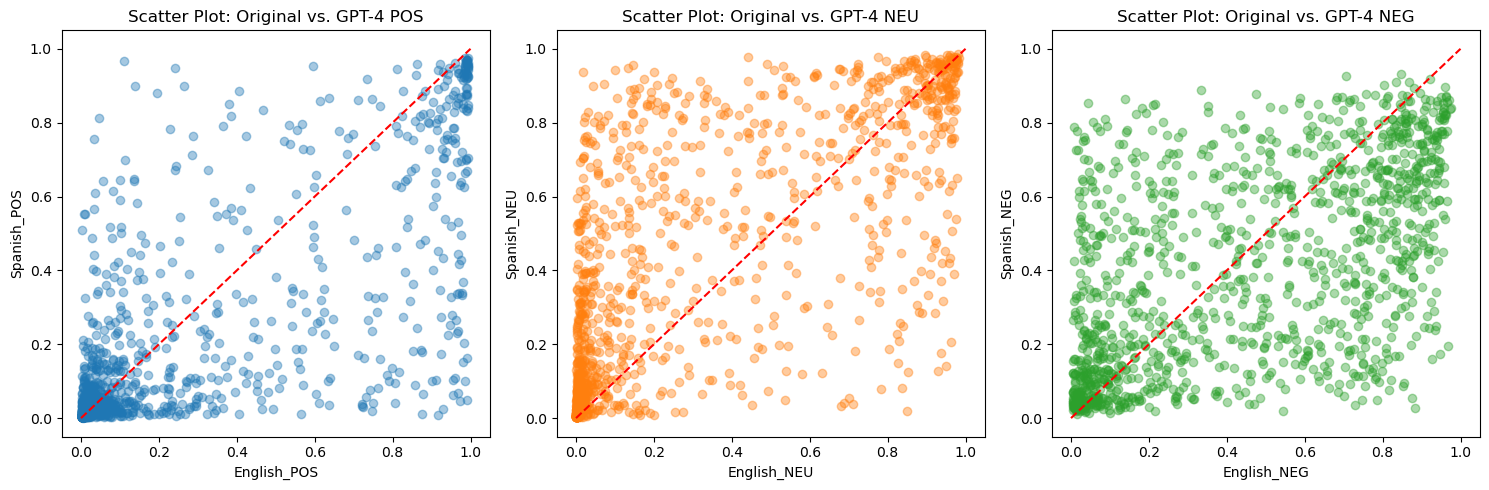

In [17]:
# Plot scatter plots with a line of equality
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].scatter(df[f'English_{sentiment}'], df[f'Spanish_{sentiment}'],color=colors[i], alpha=0.4)
    axes[i].plot([0, 1], [0, 1], 'r--')  # Line of equality
    axes[i].set_title(f'Scatter Plot: Original vs. GPT-4 {sentiment}')
    axes[i].set_xlabel(f'English_{sentiment}')
    axes[i].set_ylabel(f'Spanish_{sentiment}')

plt.tight_layout()
plt.show()
